<a href="https://colab.research.google.com/github/wania96/time-series-blood-pressure/blob/main/time%20series%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, but helpful for data visualization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [110]:
df=pd.read_csv(r'/content/Blood_Pressure.csv')

In [111]:
df.head()

,DateTime,Date,Month,Day,Year,DayofWk,Time,Hour,Meal_Time,Sys(mmHg),SysExcess,Dias(mmHg),DiaExcess,bpDelta,Pulse(bpm)
0,2019-08-01 09:15:54,2019-08-01,8,1,2019,Thu,09:15:54,9,Breakfast,132,-2,80,0,52,79
1,2019-07-31 11:39:59,2019-07-31,7,31,2019,Wed,11:39:59,11,Breakfast,126,4,77,3,49,62
2,2019-07-31 11:38:07,2019-07-31,7,31,2019,Wed,11:38:07,11,Breakfast,128,2,76,4,52,60
3,2019-07-30 13:47:46,2019-07-30,7,30,2019,Tue,13:47:46,13,Lunch,130,0,81,-1,49,63
4,2019-07-30 13:46:15,2019-07-30,7,30,2019,Tue,13:46:15,13,Lunch,134,-4,83,-3,51,62


In [112]:
df.isnull().sum()

DateTime      0
Date          0
Month         0
Day           0
Year          0
DayofWk       0
Time          0
Hour          0
Meal_Time     0
Sys(mmHg)     0
SysExcess     0
Dias(mmHg)    0
DiaExcess     0
bpDelta       0
Pulse(bpm)    0
dtype: int64

In [113]:
df = df.drop_duplicates()

In [114]:
import pandas as pd

# Define threshold values
normal_thresh = (120, 80)
prehypertension_thresh = (139, 89)
hypertension_stage1_thresh = (159, 99)

# Create a function to categorize risk
def categorize_risk(row):
    if row['Sys(mmHg)'] <= normal_thresh[0] and row['Dias(mmHg)'] <= normal_thresh[1]:
        return 'Normal'
    elif (normal_thresh[0] < row['Sys(mmHg)'] <= prehypertension_thresh[0] or
          normal_thresh[1] < row['Dias(mmHg)'] <= prehypertension_thresh[1]):
        return 'Prehypertension'
    elif (prehypertension_thresh[0] < row['Sys(mmHg)'] <= hypertension_stage1_thresh[0] or
          prehypertension_thresh[1] < row['Dias(mmHg)'] <= hypertension_stage1_thresh[1]):
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

# Apply the function to create the new column
df['Risk_Level'] = df.apply(categorize_risk, axis=1)


In [115]:
df.head()

,DateTime,Date,Month,Day,Year,DayofWk,Time,Hour,Meal_Time,Sys(mmHg),SysExcess,Dias(mmHg),DiaExcess,bpDelta,Pulse(bpm),Risk_Level
0,2019-08-01 09:15:54,2019-08-01,8,1,2019,Thu,09:15:54,9,Breakfast,132,-2,80,0,52,79,Prehypertension
1,2019-07-31 11:39:59,2019-07-31,7,31,2019,Wed,11:39:59,11,Breakfast,126,4,77,3,49,62,Prehypertension
2,2019-07-31 11:38:07,2019-07-31,7,31,2019,Wed,11:38:07,11,Breakfast,128,2,76,4,52,60,Prehypertension
3,2019-07-30 13:47:46,2019-07-30,7,30,2019,Tue,13:47:46,13,Lunch,130,0,81,-1,49,63,Prehypertension
4,2019-07-30 13:46:15,2019-07-30,7,30,2019,Tue,13:46:15,13,Lunch,134,-4,83,-3,51,62,Prehypertension


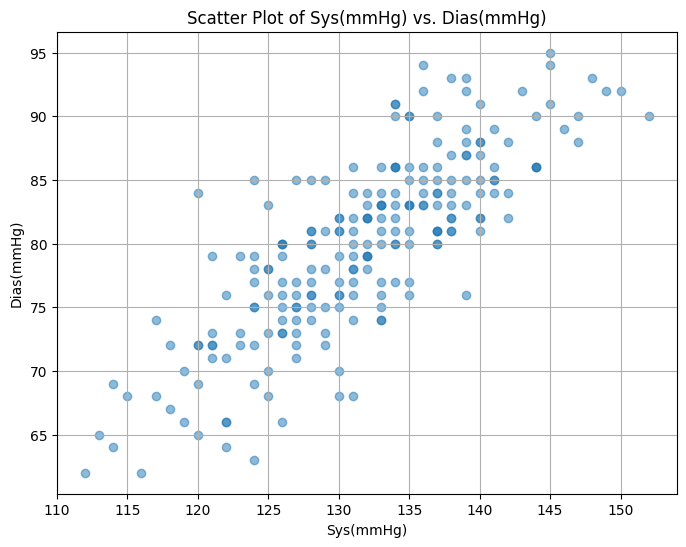

In [116]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(8, 6))
plt.scatter(df['Sys(mmHg)'], df['Dias(mmHg)'], alpha=0.5)
plt.title('Scatter Plot of Sys(mmHg) vs. Dias(mmHg)')
plt.xlabel('Sys(mmHg)')
plt.ylabel('Dias(mmHg)')
plt.grid(True)
plt.show()


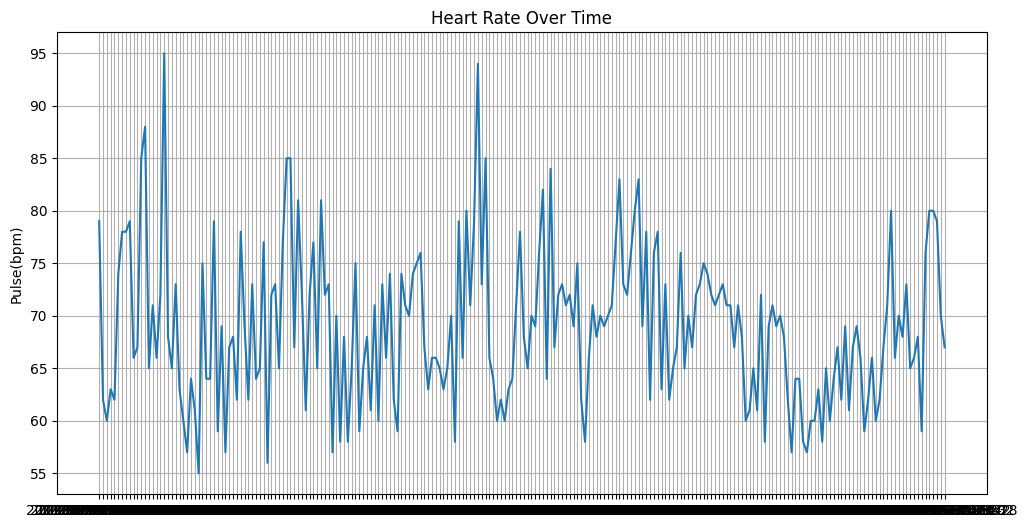

In [117]:
# Line plot of 'DateTime' vs. 'Pulse(bpm)'
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Pulse(bpm)'])
plt.title('Heart Rate Over Time')
plt.ylabel('Pulse(bpm)')
plt.grid(True)
plt.show()

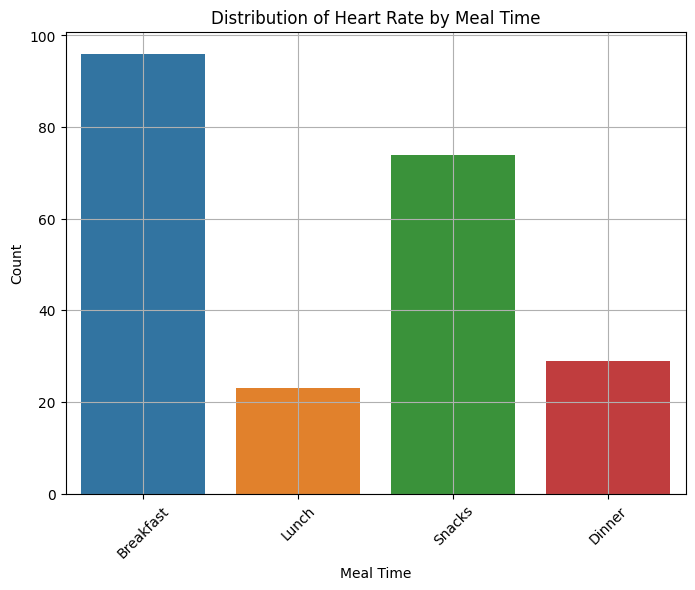

In [118]:
# Bar plot of 'Meal_Time'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Meal_Time')
plt.title('Distribution of Heart Rate by Meal Time')
plt.xlabel('Meal Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


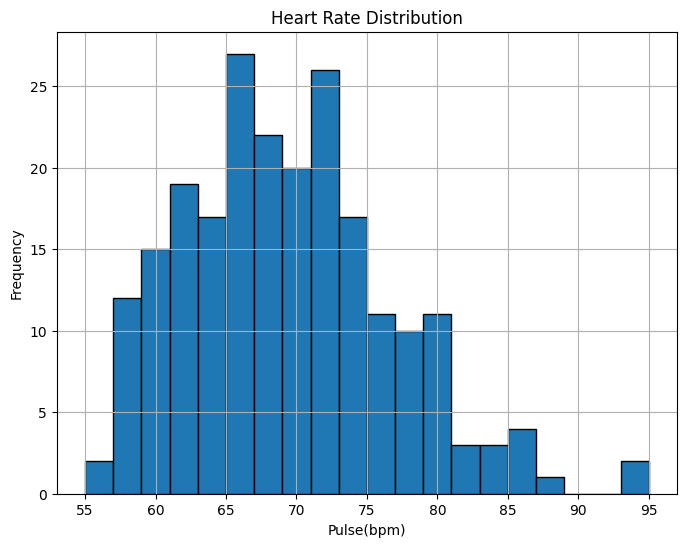

In [119]:
# Histogram of 'Pulse(bpm)'
plt.figure(figsize=(8, 6))
plt.hist(df['Pulse(bpm)'], bins=20, edgecolor='k')
plt.title('Heart Rate Distribution')
plt.xlabel('Pulse(bpm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

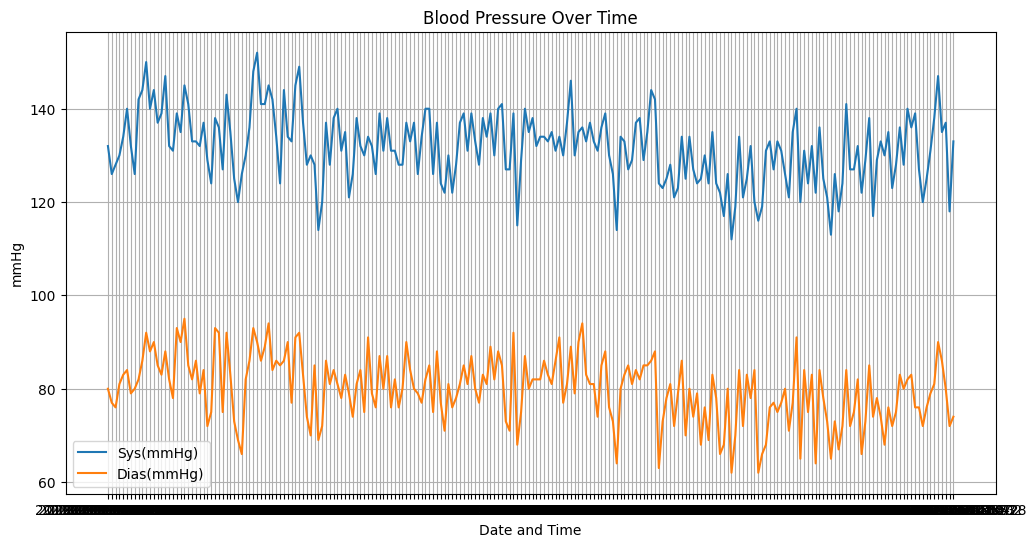

In [120]:
# Line plot of 'DateTime' vs. 'Sys(mmHg)' and 'Dias(mmHg)'
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Sys(mmHg)'], label='Sys(mmHg)')
plt.plot(df['DateTime'], df['Dias(mmHg)'], label='Dias(mmHg)')
plt.title('Blood Pressure Over Time')
plt.xlabel('Date and Time')
plt.ylabel('mmHg')
plt.xlabel('Date and Time')
plt.xticks()
plt.legend()
plt.grid(True)
plt.show()

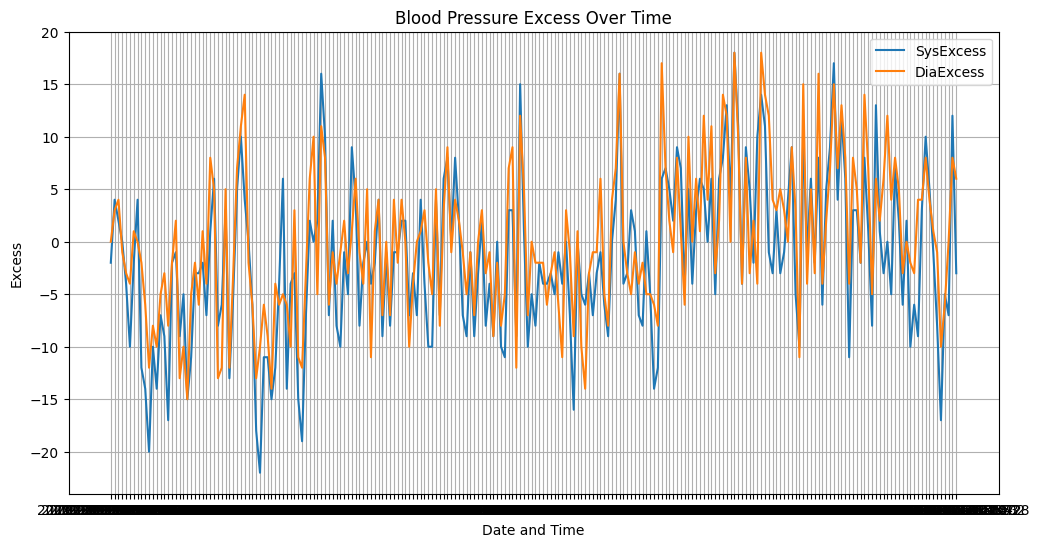

In [121]:
# Line plot of 'DateTime' vs. 'SysExcess' and 'DiaExcess'
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['SysExcess'], label='SysExcess')
plt.plot(df['DateTime'], df['DiaExcess'], label='DiaExcess')
plt.title('Blood Pressure Excess Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Excess')
plt.legend()
plt.xticks()
plt.grid(True)
plt.show()

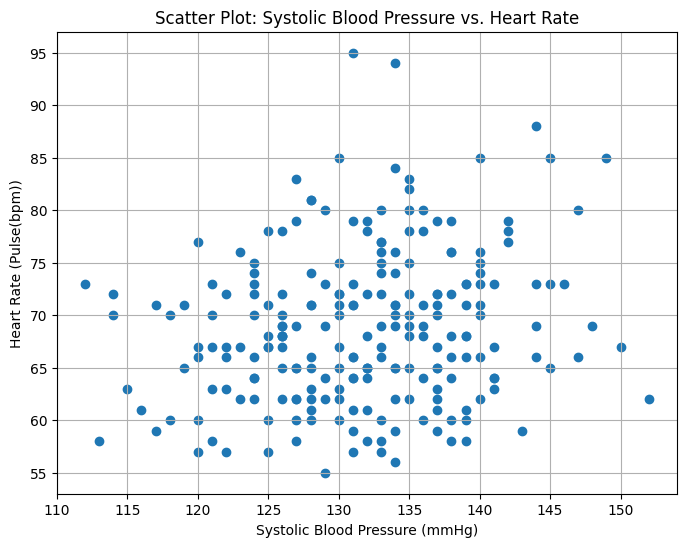

In [122]:
# Scatter plot of 'Sys(mmHg)' vs. 'Pulse(bpm)'
plt.figure(figsize=(8, 6))
plt.scatter(df['Sys(mmHg)'], df['Pulse(bpm)'])
plt.title('Scatter Plot: Systolic Blood Pressure vs. Heart Rate')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Heart Rate (Pulse(bpm))')
plt.grid(True)
plt.show()

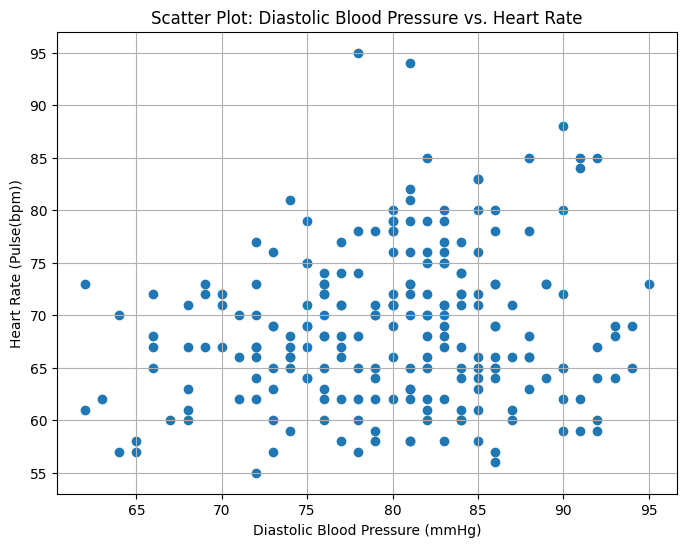

In [123]:
# Scatter plot of 'Dias(mmHg)' vs. 'Pulse(bpm)'
plt.figure(figsize=(8, 6))
plt.scatter(df['Dias(mmHg)'], df['Pulse(bpm)'])
plt.title('Scatter Plot: Diastolic Blood Pressure vs. Heart Rate')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Heart Rate (Pulse(bpm))')
plt.grid(True)
plt.show()

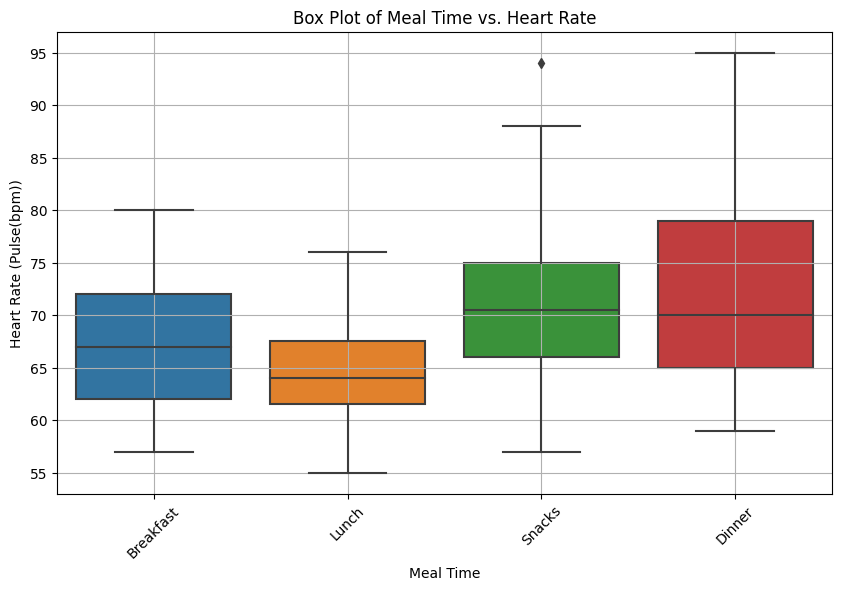

In [124]:
import seaborn as sns

# Box plot of 'Meal_Time' vs. 'Pulse(bpm)'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Meal_Time', y='Pulse(bpm)', data=df)
plt.title('Box Plot of Meal Time vs. Heart Rate')
plt.xlabel('Meal Time')
plt.ylabel('Heart Rate (Pulse(bpm))')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

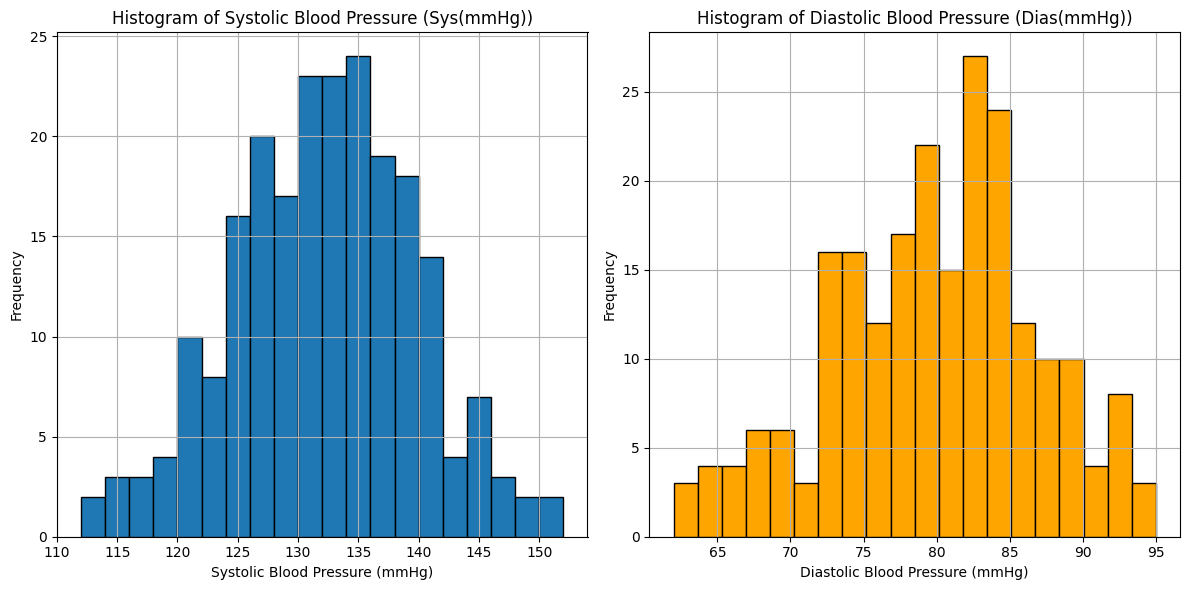

In [125]:
# Histogram of 'Sys(mmHg)' and 'Dias(mmHg)'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Sys(mmHg)'], bins=20, edgecolor='black')
plt.title('Histogram of Systolic Blood Pressure (Sys(mmHg))')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(df['Dias(mmHg)'], bins=20, edgecolor='black', color='orange')
plt.title('Histogram of Diastolic Blood Pressure (Dias(mmHg))')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

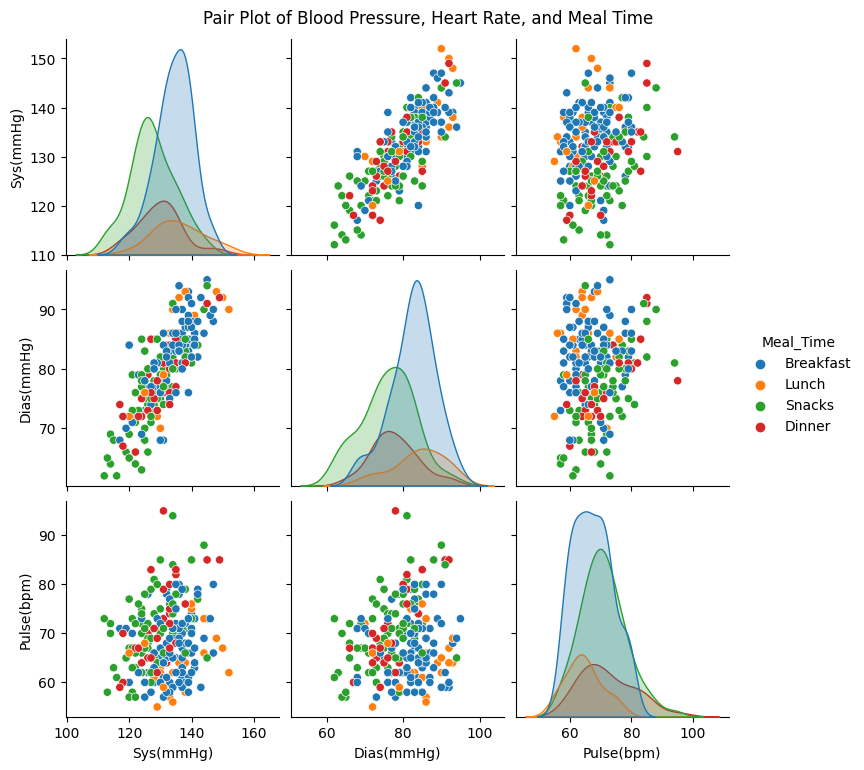

In [126]:
# Pair plot to visualize relationships between variables
sns.pairplot(df[['Sys(mmHg)', 'Dias(mmHg)', 'Pulse(bpm)', 'Meal_Time']], hue='Meal_Time')
plt.suptitle('Pair Plot of Blood Pressure, Heart Rate, and Meal Time', y=1.02)
plt.show()

In [127]:
columns_to_remove = ['Sys(mmHg)', 'Dias(mmHg)', 'SysExcess', 'DiaExcess', 'bpDelta', 'Date', 'Month', 'Day', 'Year', 'DayofWk', 'Time', 'Hour']
df_cleaned = df.drop(columns=columns_to_remove)


In [128]:

df_cleaned.head()

,DateTime,Meal_Time,Pulse(bpm),Risk_Level
0,2019-08-01 09:15:54,Breakfast,79,Prehypertension
1,2019-07-31 11:39:59,Breakfast,62,Prehypertension
2,2019-07-31 11:38:07,Breakfast,60,Prehypertension
3,2019-07-30 13:47:46,Lunch,63,Prehypertension
4,2019-07-30 13:46:15,Lunch,62,Prehypertension


In [129]:
df_cleaned.dtypes

DateTime      object
Meal_Time     object
Pulse(bpm)     int64
Risk_Level    object
dtype: object

In [130]:
df_cleaned['DateTime'] = pd.to_datetime(df_cleaned['DateTime'])


In [131]:
df_cleaned.columns

Index(['DateTime', 'Meal_Time', 'Pulse(bpm)', 'Risk_Level'], dtype='object')

In [132]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_cleaned['Meal_Time'] = label_encoder.fit_transform(df_cleaned['Meal_Time'])
df_cleaned['Risk_Level'] = label_encoder.fit_transform(df_cleaned['Risk_Level'])


In [133]:
df_cleaned.head()

,DateTime,Meal_Time,Pulse(bpm),Risk_Level
0,2019-08-01 09:15:54,0,79,2
1,2019-07-31 11:39:59,0,62,2
2,2019-07-31 11:38:07,0,60,2
3,2019-07-30 13:47:46,2,63,2
4,2019-07-30 13:46:15,2,62,2


In [134]:
df_cleaned.set_index('DateTime', inplace=True)

In [135]:
df_cleaned.head()

,Meal_Time,Pulse(bpm),Risk_Level
DateTime,,,
2019-08-01 09:15:54,0,79,2
2019-07-31 11:39:59,0,62,2
2019-07-31 11:38:07,0,60,2
2019-07-30 13:47:46,2,63,2
2019-07-30 13:46:15,2,62,2


In [136]:
from statsmodels.tsa.arima.model import ARIMA


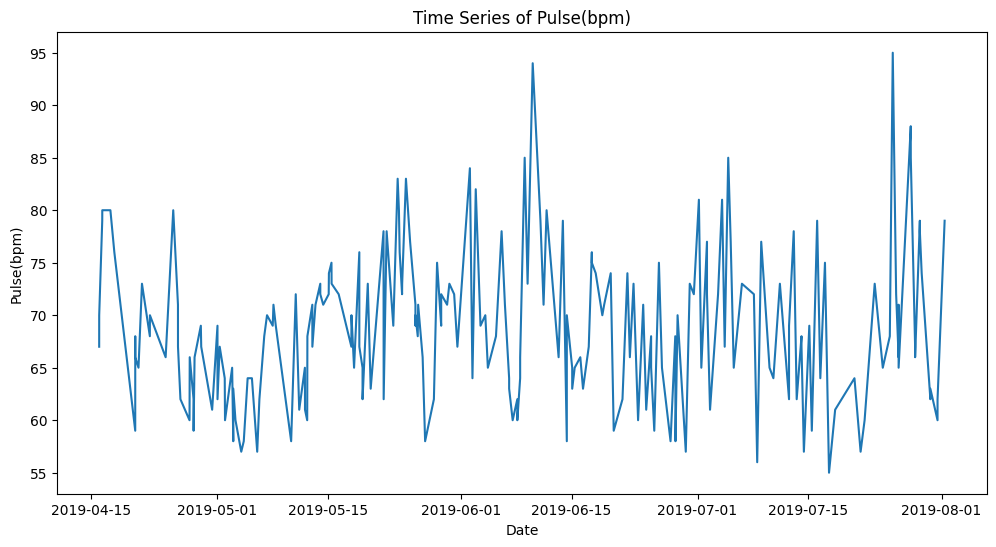

In [137]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned['Pulse(bpm)'])
plt.title('Time Series of Pulse(bpm)')
plt.xlabel('Date')
plt.ylabel('Pulse(bpm)')
plt.show()

In [138]:
df_cleaned

,Meal_Time,Pulse(bpm),Risk_Level
DateTime,,,
2019-08-01 09:15:54,0,79,2
2019-07-31 11:39:59,0,62,2
2019-07-31 11:38:07,0,60,2
2019-07-30 13:47:46,2,63,2
2019-07-30 13:46:15,2,62,2
...,...,...,...
2019-04-17 09:50:47,0,80,0
2019-04-16 09:07:23,0,80,2
2019-04-16 08:58:42,0,79,2


In [139]:
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    if p_value <= 0.05:
        return True  # Data is stationary
    else:
        return False  # Data is not stationary


In [140]:
from statsmodels.tsa.stattools import adfuller
time_series_data = df_cleaned['Pulse(bpm)']

is_stationary = test_stationarity(time_series_data)

if is_stationary:
    print("The data is stationary.")
else:
    print("The data is not stationary.")



The data is stationary.


In [141]:
upper_threshold = 100
lower_threshold = 60

In [142]:
# Define the forecast period (in this case, 2 weeks)
forecast_period = 2 * 7 * 24  # 2 weeks, assuming hourly data

In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df_cleaned['Pulse(bpm)'], model='multiplicable',period=12)

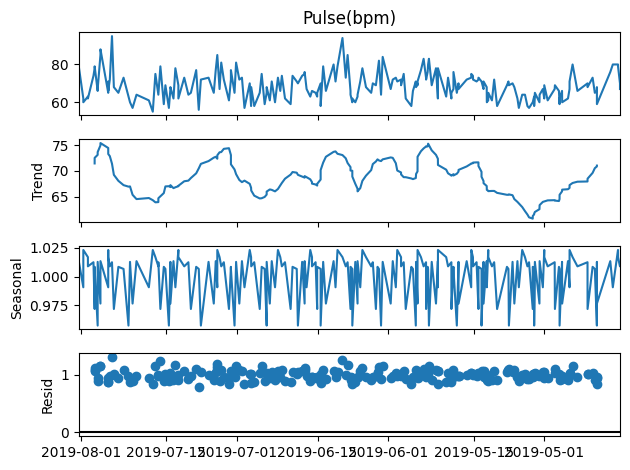

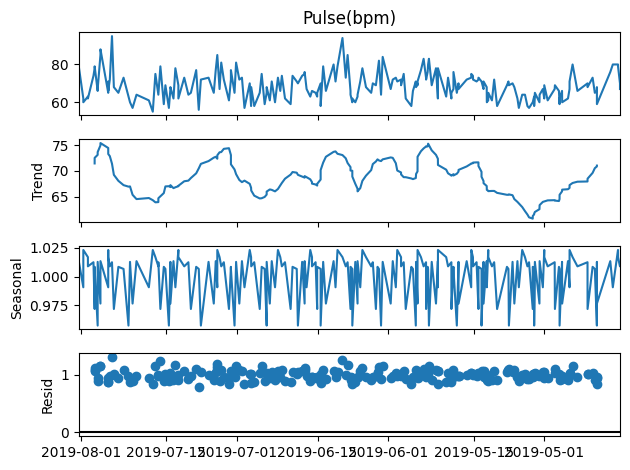

In [144]:
result.plot()


In [145]:
from statsmodels.tsa.stattools import adfuller

pulse_data = df_cleaned['Pulse(bpm)']

# Perform the Augmented Dickey-Fuller (ADF) test
result = adfuller(pulse_data)

# Print the ADF test results
print("ADF Statistic:", result[0])
print("P-Value:", result[1])

# Interpret the results
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is not stationary (fail to reject the null hypothesis).")

ADF Statistic: -5.762288774645018
P-Value: 5.635874394338676e-07
The data is stationary (reject the null hypothesis).


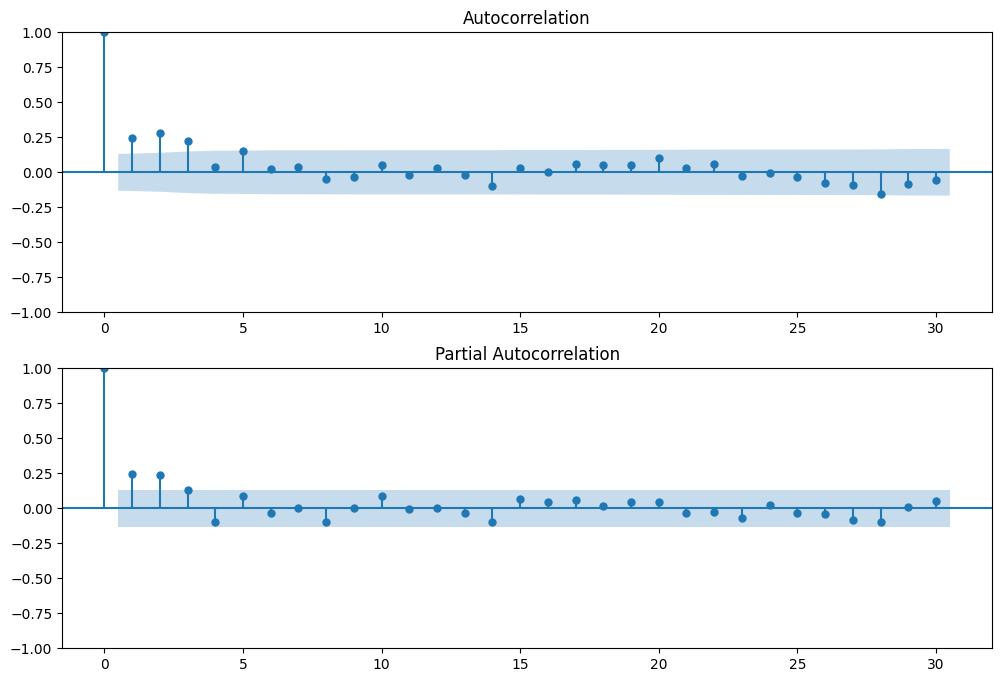

In [146]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_cleaned['Pulse(bpm)'], lags=30, ax=ax1)
plot_pacf(df_cleaned['Pulse(bpm)'], lags=30, ax=ax2)
plt.show()

In [147]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
acf_values = acf(df_cleaned['Pulse(bpm)'])
pacf_values = pacf(df_cleaned['Pulse(bpm)'])
print("ACF Values:", acf_values)
print("PACF Values:", pacf_values)


ACF Values: [ 1.          0.24348464  0.28105797  0.226731    0.03982508  0.15110632
  0.02611803  0.03947428 -0.04542855 -0.03039282  0.05373469 -0.01986299
  0.03097767 -0.01816739 -0.09571343  0.03345353  0.00364614  0.05718601
  0.05552428  0.05538718  0.09880066  0.02855624  0.05864533 -0.02745757]
PACF Values: [ 1.00000000e+00  2.44586378e-01  2.38030102e-01  1.33905275e-01
 -1.01187290e-01  8.83705878e-02 -3.25063090e-02  3.70227509e-03
 -1.04662758e-01  2.22257143e-04  9.20328044e-02 -5.73716270e-03
  1.08984069e-03 -3.35956522e-02 -1.02107643e-01  7.24219194e-02
  4.81761093e-02  6.11361736e-02  1.99100036e-02  4.65410281e-02
  5.22336701e-02 -3.63468004e-02 -2.76965026e-02 -7.74407956e-02]


In [148]:
decomposition = seasonal_decompose(df_cleaned['Pulse(bpm)'], model='multiplicative',period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

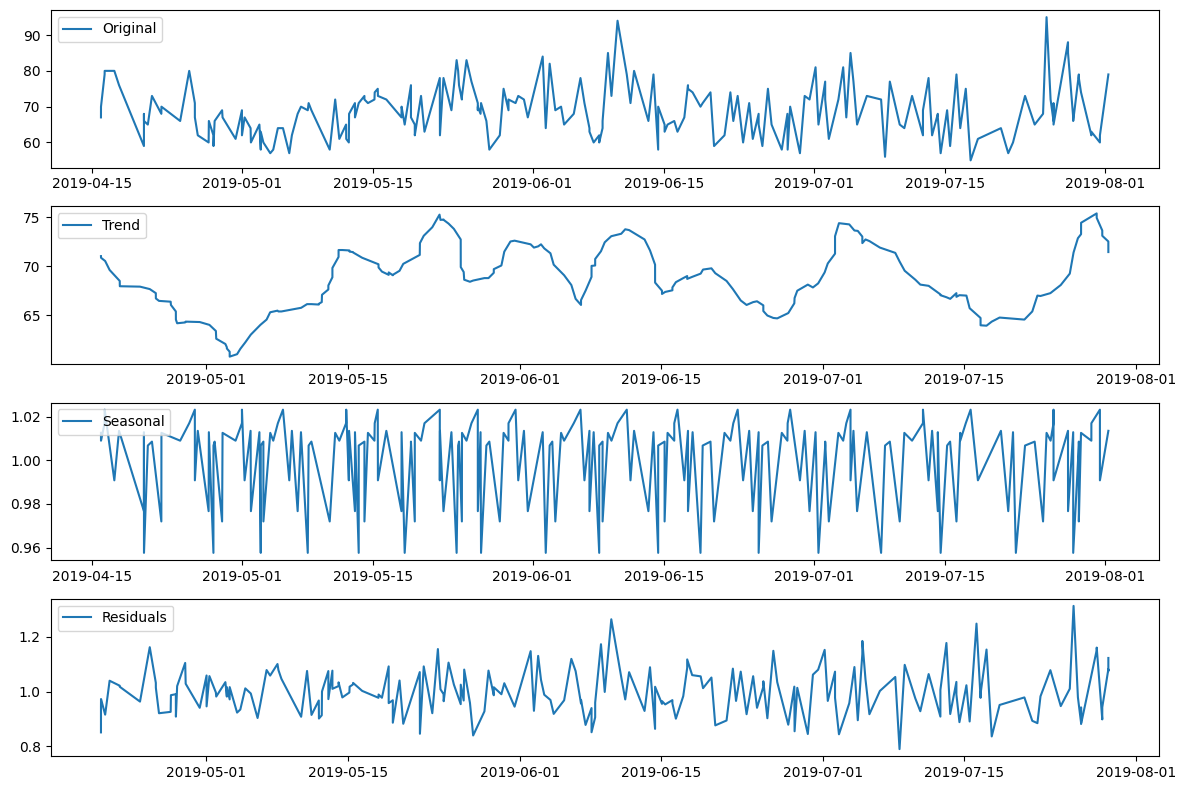

In [149]:
# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_cleaned['Pulse(bpm)'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

In [150]:
# train-set size
size = 0.8
# split the dataset
train, test = df_cleaned['Pulse(bpm)'].iloc[:int(size*len(df_cleaned['Pulse(bpm)']))], df_cleaned['Pulse(bpm)'].iloc[int(size*len(df_cleaned['Pulse(bpm)'])):]

In [151]:
train.head()

DateTime
2019-08-01 09:15:54    79
2019-07-31 11:39:59    62
2019-07-31 11:38:07    60
2019-07-30 13:47:46    63
2019-07-30 13:46:15    62
Name: Pulse(bpm), dtype: int64

In [152]:
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]

    print("ADF Test Result:")
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print(f'Critical Values: {critical_values}')
    print('\n')
    if adf_statistic < critical_values["5%"] and p_value < 0.05:
        print('The time series is likely stationary (i.e. Reject the Null Hypothesis)')
    else:
        print('The time series is likely non-stationary (i.e. Do not reject the Null Hypothesis)')

In [153]:
test_stationarity(df_cleaned['Pulse(bpm)'])

ADF Test Result:
ADF Statistic: -5.762288774645018
p-value: 5.635874394338676e-07
Critical Values: {'1%': -3.460707667106296, '5%': -2.874891213486339, '10%': -2.573885987711472}


The time series is likely stationary (i.e. Reject the Null Hypothesis)


In [154]:
pip install pmdarima


In [155]:
from pmdarima.arima import auto_arima
model_param = auto_arima(train, seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,2)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "/usr/local/lib/python3

 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1215.684, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1214.849, Time=0.97 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1215.967, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2008.066, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1213.156, Time=0.08 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1214.869, Time=0.28 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1207.332, Time=0.16 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1209.334, Time=1.47 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=1209.298, Time=0.59 sec


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,0)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "/usr/local/lib/python3

 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=1206.179, Time=1.13 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=1208.185, Time=4.13 sec
 ARIMA(3,0,0)(0,0,1)[12] intercept   : AIC=1208.153, Time=1.12 sec


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,0,0)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "/usr/local/lib/python3

 ARIMA(3,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(4,0,0)(0,0,0)[12] intercept   : AIC=1205.450, Time=0.83 sec
 ARIMA(4,0,0)(1,0,0)[12] intercept   : AIC=1207.422, Time=3.61 sec
 ARIMA(4,0,0)(0,0,1)[12] intercept   : AIC=1207.381, Time=3.19 sec
 ARIMA(4,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(5,0,0)(0,0,0)[12] intercept   : AIC=1206.883, Time=1.63 sec
 ARIMA(4,0,1)(0,0,0)[12] intercept   : AIC=1207.414, Time=1.15 sec
 ARIMA(3,0,1)(0,0,0)[12] intercept   : AIC=1204.818, Time=1.60 sec
 ARIMA(3,0,1)(1,0,0)[12] intercept   : AIC=1209.889, Time=5.16 sec
 ARIMA(3,0,1)(0,0,1)[12] intercept   : AIC=1207.632, Time=3.26 sec


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,0,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "/usr/local/lib/python3

 ARIMA(3,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1207.875, Time=0.84 sec
 ARIMA(3,0,2)(0,0,0)[12] intercept   : AIC=1208.731, Time=1.40 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1208.830, Time=1.47 sec
 ARIMA(4,0,2)(0,0,0)[12] intercept   : AIC=1208.385, Time=1.53 sec
 ARIMA(3,0,1)(0,0,0)[12]             : AIC=inf, Time=0.95 sec

Best model:  ARIMA(3,0,1)(0,0,0)[12] intercept
Total fit time: 59.983 seconds


In [156]:
# Assuming 'train' is your training dataset and 'test' is your testing dataset

# Fit the ARIMA model with the identified parameters to the entire dataset
p, d, q, P, D, Q, S = 3, 0, 1, 0, 0, 0, 12  # Best model parameters

model = ARIMA(train, order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [157]:
test.head()

DateTime
2019-05-08 00:46:19    69
2019-05-07 07:22:46    70
2019-05-06 22:52:29    68
2019-05-06 08:08:11    62
2019-05-06 01:27:50    57
Name: Pulse(bpm), dtype: int64

In [158]:
test_forecast = model_fit.predict(start=len(test), end=len(test) + len(test) - 1, dynamic=False)

# Create a DataFrame to store the actual and forecasted values
pred_df = pd.DataFrame({'Actual_Pulse(bpm)': test.values, 'Forecasted_Pulse(bpm)': test_forecast.values}, index=test.index)

# Print or use the 'forecast_df' DataFrame to compare actual and forecasted values
pred_df.head()

,Actual_Pulse(bpm),Forecasted_Pulse(bpm)
DateTime,,
2019-05-08 00:46:19,69,69.639610
2019-05-07 07:22:46,70,68.249212
2019-05-06 22:52:29,68,67.651661
2019-05-06 08:08:11,62,71.893023
2019-05-06 01:27:50,57,68.637063


In [159]:
from statsmodels.tsa.arima.model import ARIMA

# Make predictions for the next two weeks (assuming daily data)
forecast_steps = 14  # Two weeks with daily data

# Forecast the next two weeks
forecast = model_fit.forecast(steps=forecast_steps)

# Extend the index to include the forecasted dates
last_date = df_cleaned.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'DateTime': forecast_index, 'Forecasted_Pulse(bpm)': forecast})

# Print or use the 'forecast_df' DataFrame, which contains the forecasted values for the next two weeks
forecast_df.set_index('DateTime', inplace=True)
forecast_df.head()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,Forecasted_Pulse(bpm)
DateTime,
2019-04-16 23:38:28,67.085219
2019-04-17 23:38:28,71.123939
2019-04-18 23:38:28,68.457968
2019-04-19 23:38:28,69.877099
2019-04-20 23:38:28,69.533819


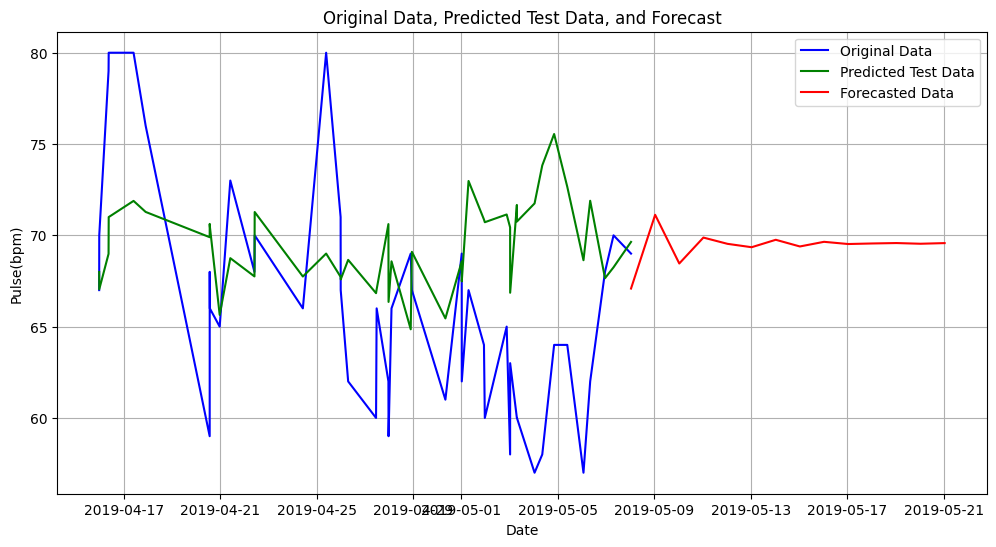

In [160]:
# Use the first date from the 'test' data as the start date
start_date = test.index[0]

# Extend the index to include the forecasted dates
forecast_steps = 14  # Two weeks with daily data

forecast_index = pd.date_range(start=start_date, periods=forecast_steps, freq='D')

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'DateTime': forecast_index, 'Forecasted_Pulse(bpm)': forecast})

# Set the index to 'DateTime'
forecast_df.set_index('DateTime', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Original Data', color='blue')
plt.plot(pred_df.index, pred_df['Forecasted_Pulse(bpm)'], label='Predicted Test Data', color='green')
plt.plot(forecast_df.index, forecast_df['Forecasted_Pulse(bpm)'], label='Forecasted Data', color='red')

plt.xlabel('Date')
plt.ylabel('Pulse(bpm)')
plt.title('Original Data, Predicted Test Data, and Forecast')
plt.legend()
plt.grid()

plt.show()


In [161]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_cleaned['Pulse(bpm)'] = scaler.fit_transform(df_cleaned['Pulse(bpm)'].values.reshape(-1, 1))

In [162]:
train_size=int(len(df_cleaned)*0.7)

In [163]:
train_data = df_cleaned[:train_size]
test_data = df_cleaned[train_size:]

Epoch 1/250
35/35 [==============================] - 2s 6ms/step - loss: 0.0856
Epoch 2/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0366
Epoch 3/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0330
Epoch 4/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0330
Epoch 5/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0328
Epoch 6/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0334
Epoch 7/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0330
Epoch 8/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0328
Epoch 9/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0325
Epoch 10/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0329
Epoch 11/250
35/35 [==============================] - 0s 8ms/step - loss: 0.0332
Epoch 12/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0331
Epoch 13/250
35/35 [=================

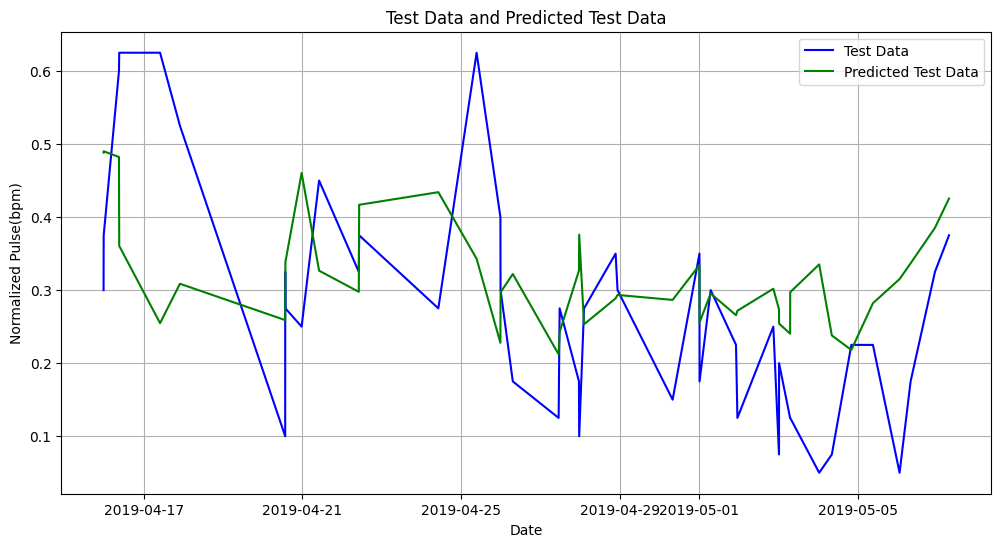

In [206]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming you have already preprocessed and normalized your data
# df_cleaned = ...

# Define the sequence length (how many past data points to consider)
sequence_length = 5

# Create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Extract the normalized 'Pulse(bpm)' column for training
pulse_values = df_cleaned['Pulse(bpm)'].values
X, y = create_sequences(pulse_values, sequence_length)

# Define the split point
split_point = int(0.8 * len(X))

# Split the data into training and testing sets
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Build an LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=250, batch_size=5)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot the test data and predicted values
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index[split_point+sequence_length:], y_test, label='Test Data', color='blue')
plt.plot(df_cleaned.index[split_point+sequence_length:], y_pred, label='Predicted Test Data', color='green')

plt.xlabel('Date')
plt.ylabel('Normalized Pulse(bpm)')
plt.title('Test Data and Predicted Test Data')
plt.legend()
plt.grid()
plt.show()


In [165]:
test_predicted = model.predict(X_test)
train_predicted = model.predict(X_train)

6/6 [==============================] - 0s 6ms/step
